In [1]:
#Import Package
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.patches import Patch

In [2]:
#Loading Forms
#Ignore Lines Starting With #
#Ensure You Put This File With Your Excels/CSVs... In One Folder
#Change the forms' names to yours and then just need to run the program!
df_week = pd.read_csv("techweek.csv",comment="#")
df_month = pd.read_csv("techmonth.csv",comment="#")
df_halfyear = pd.read_csv("techhalfyear.csv",comment="#")

In [3]:
#Preview Data
#Check if you loaded them successfully
print(df_week.head())#5 rows as default
print(df_month.head())
print(df_halfyear.head())

  Screen resolution  Users  New users  Engaged sessions  Engagement rate  \
0          1440x900    110         92               106         0.731034   
1         1920x1080    107         96               107         0.775362   
2          1536x864     70         49                70         0.804598   
3           390x844     61         61                44         0.666667   
4          1366x768     49         40                46         0.793103   

   Engaged sessions per user  Average engagement time  Event count  \
0                   0.963636               112.981818         1456   
1                   1.000000               142.037383         1541   
2                   1.000000               159.057143          681   
3                   0.721311                65.114754          439   
4                   0.938776               136.653061          351   

   Conversions  Total revenue  
0            0              0  
1            0              0  
2            0            

In [4]:
#Display What Kinds of Data We Are Analyzing
print(df_week.columns[0])
print(df_month.columns[0])
print(df_halfyear.columns[0])

Screen resolution
Screen resolution
Screen resolution


In [5]:
#Users; New users; Engaged sessions; Engagement rate; Engaged sessions per user; Average engagement time; Event count
#are meaningful here
#Below will be using bar charts & pie charts

In [6]:
#Barplots
df_comb = [df_week, df_month, df_halfyear]#Combination of three period's forms
subtitle_comb = ["Last Week", "Last Month", "Last 6 Month"]#Combination of different titles
def barplot_tech(df_,
                col="Screen resolution",#Display what metric we are analyzing
                num=10,#Num determines how many items on the graph, sorted and get the first num
                title_="",#Whole title name
                width_=0.15,#Bar width
                figsize1=20,#Figure width
                figsize2=20,#Figure height
                xfont=20,#Xlabel fontsize
                yfont=20,#Ylabel fontsize
                titlefont=20,#Whole title fontsize
                labelfont=20,#Label fontsize
                legend_1font=20,#Internal legend fontsize
                comlegend=20,#External legend fontsize
                subfont=20,#Subtitle fontsize
                textfont=20,#Text after bar: fontsize
                legtitle=30#Legend title font size
                ):#When running functions, lease adjust parameters if you want
    
    #Sort
    df = (df_.sort_values(by="Users", ascending=False)).head(num)
    
    #Below list all the columns of interest to display in graph
    user = df["Users"]
    new_user = df["New users"]
    eng_ses = df["Engaged sessions"]
    event_cnt = df["Event count"]
    
    #Construction of plots
    #Preset
    n = df.shape[0]#Number of rows (posts)
    ind = np.arange(n)
    width = width_
    #Initialization
    fig, ax = plt.subplots(figsize=(figsize1, figsize2))
    #Draw side-by-side barplots and store the returned objects
    bars_user = ax.barh(ind, user, height=width, label='Users')#Notice here I use ax.barh to do the plotting
    bars_new_user = ax.barh(ind + width, new_user, height=width, label='New Users')
    bars_engagement = ax.barh(ind + width * 2, eng_ses, height=width, label='Engaged Sessions')
    bars_eventcnt = ax.barh(ind + width * 3, event_cnt, height=width, label="Event Count")
    #Add the exact value to the right of each bar
    for bars in [bars_user, bars_new_user, bars_engagement, bars_eventcnt]:
        for bar in bars:
            value = bar.get_width()#Get bar's width
            ax.text(value, bar.get_y() + bar.get_height()/2,#Annotating location
                    f'{value}',#Text
                    va='center', ha='left',fontsize=textfont)#Ax.text to annotate
    #Set labels & title & ticks
    ax.set_xlabel('Count',fontsize=xfont)#Label X-axis, notice here I use ax.set to do the setting
    ax.set_ylabel(col,fontsize=yfont)#Label Y-axis
    ax.set_title(title_,fontsize=titlefont)#Set title
    ax.set_yticks(ind + width * 1.5, df[col],fontsize=labelfont)#Label each row in the plot, add ticks
    plt.suptitle(f"Tech Data Analytics: {col}",fontsize=subfont)#Subtitle  
    #Set legends
    #First legend for metrics
    handles, labels = ax.get_legend_handles_labels()
    first_legend = ax.legend(handles, labels, loc='best', title="Metrics",fontsize=legend_1font)
    ax.add_artist(first_legend)
    #Combined legend for engagement rate and click-through rate per post
    combined_rate_handles = [
        #Legend's content
        Patch(label=f"""{row[col]}: 
        Eng. Rate: {row['Engagement rate']:.2f}; 
        Eng. Sessions / User: {row['Engaged sessions per user']:.2f}; 
        Avg. Eng. Time: {row['Average engagement time']:.2f}""")
        for _, row in df.iterrows()
    ]
    ax.legend(handles=combined_rate_handles, title="Eng. Rate & Eng. Sessions Per User & Avg. Eng. Time",
                                fontsize=comlegend, loc='upper left', bbox_to_anchor=(1, 1.05),
              title_fontsize=legtitle)#Place the legend outside
    
    #Show
    plt.show()

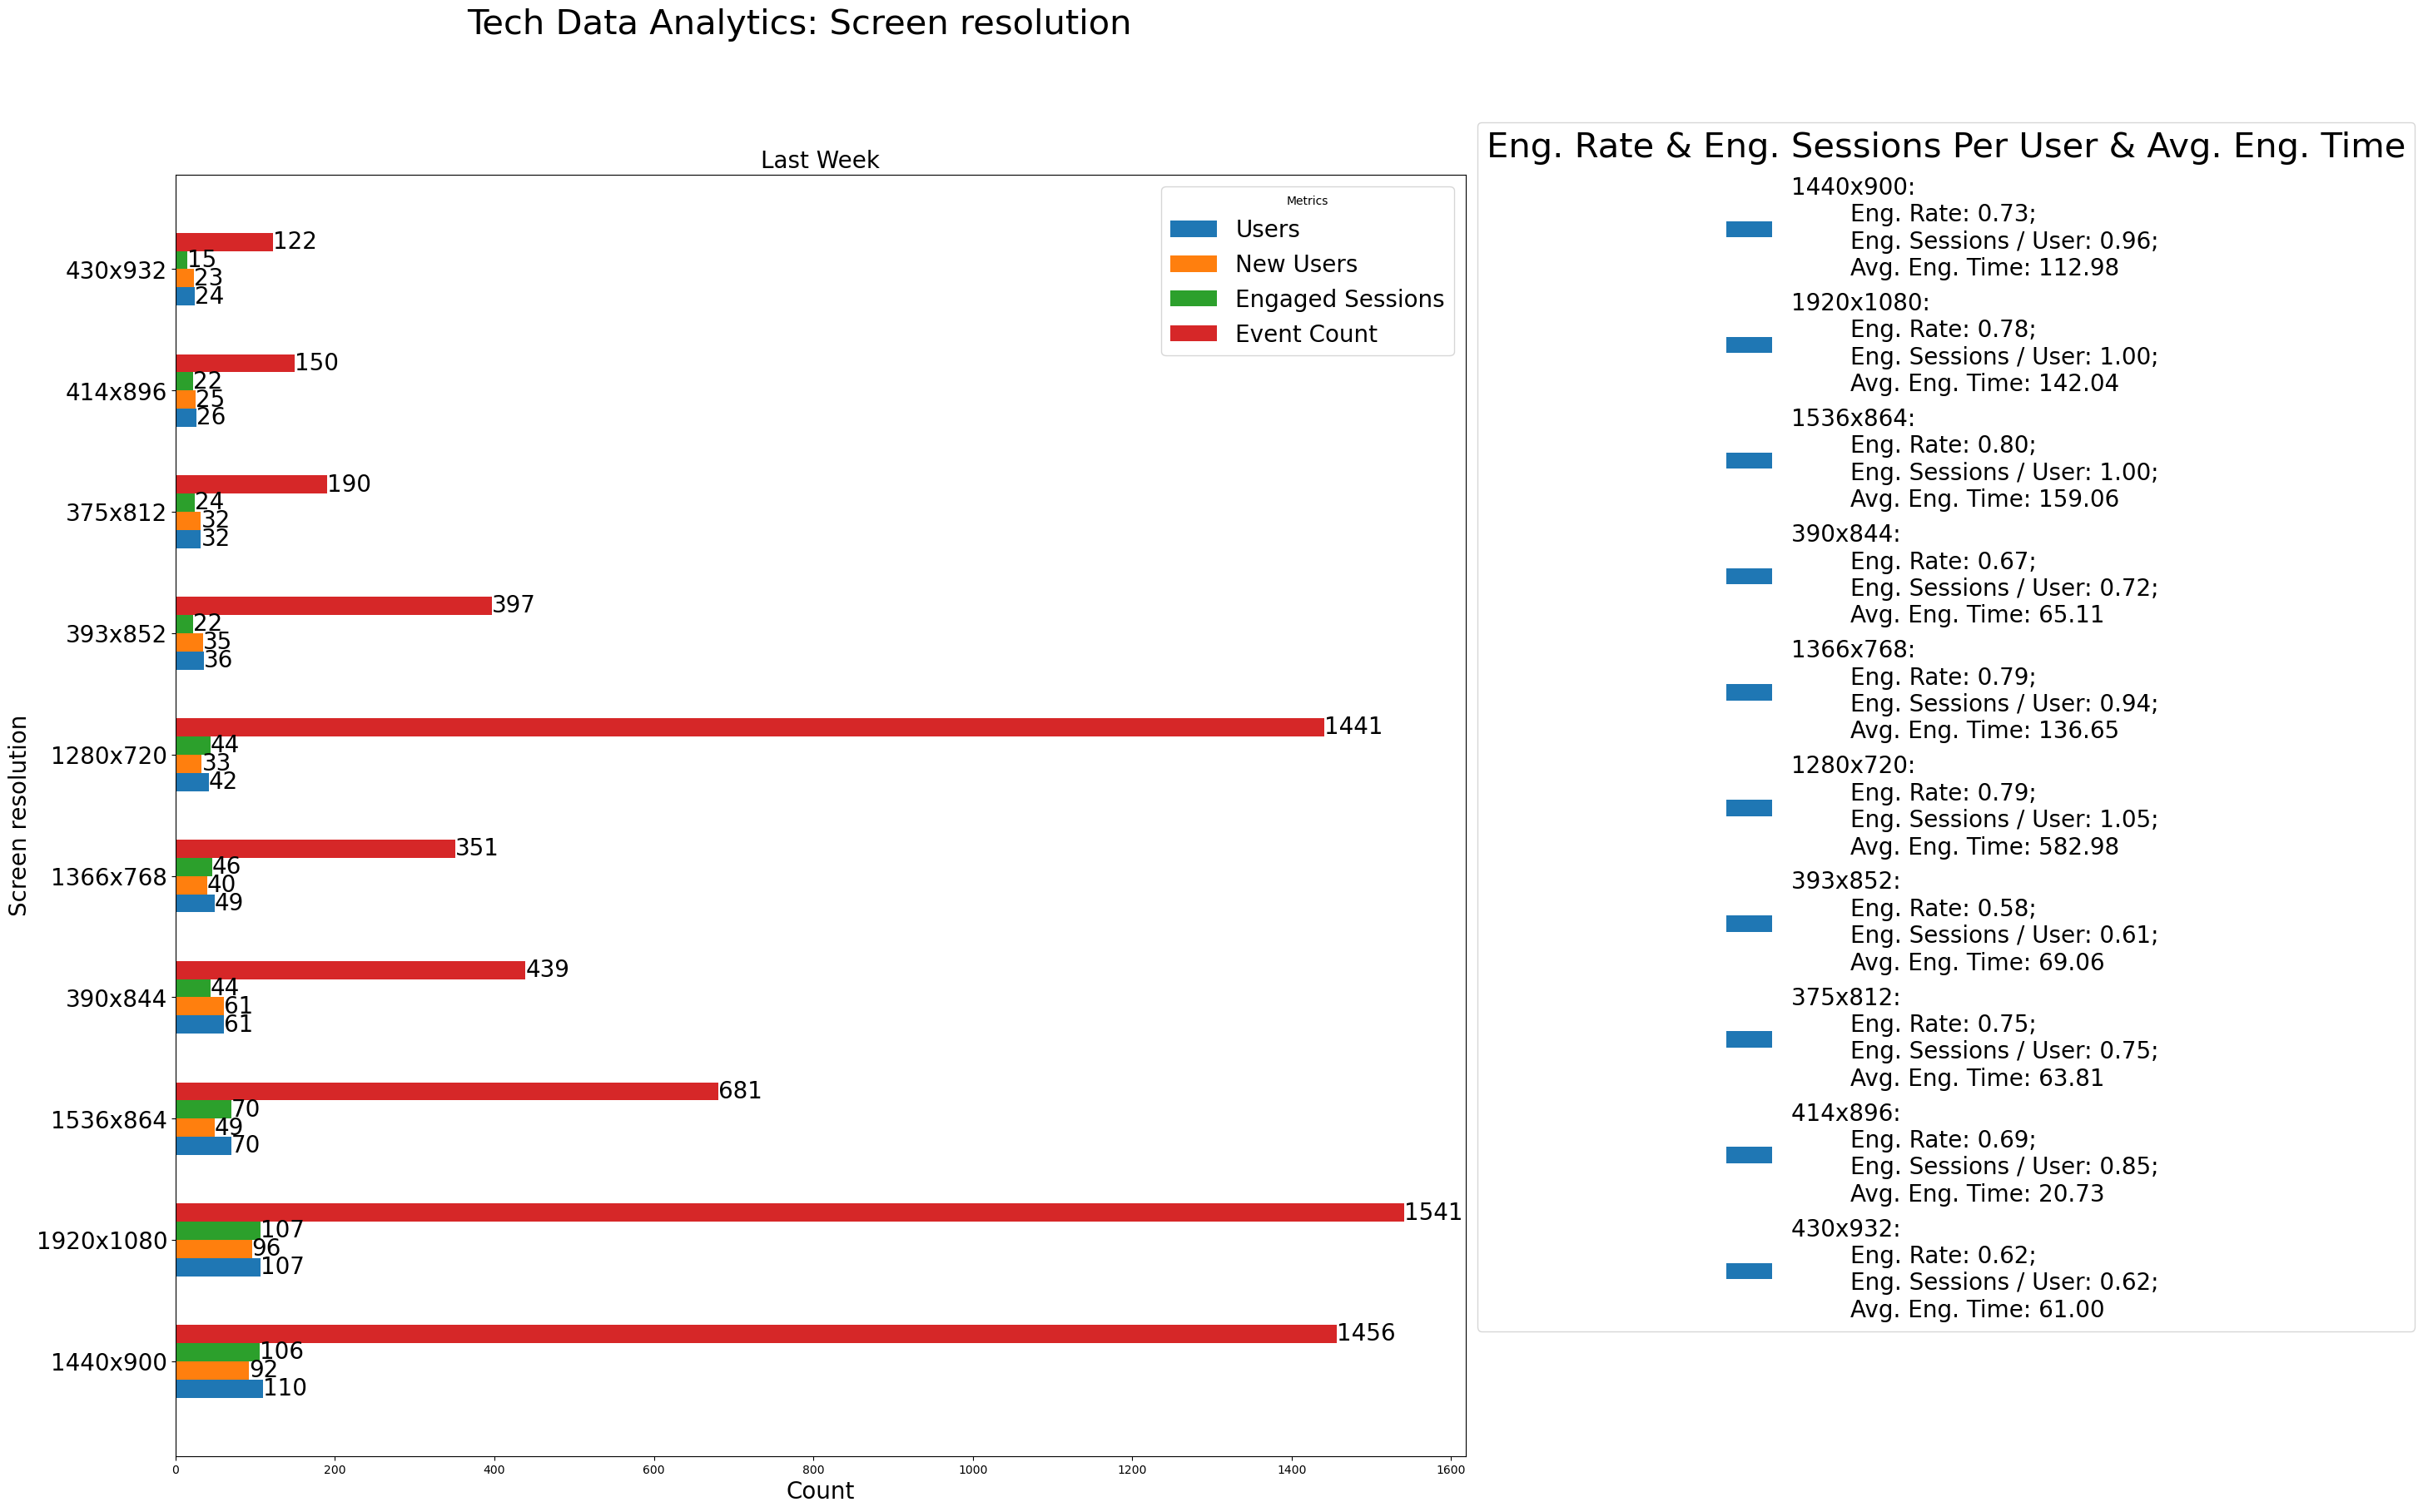

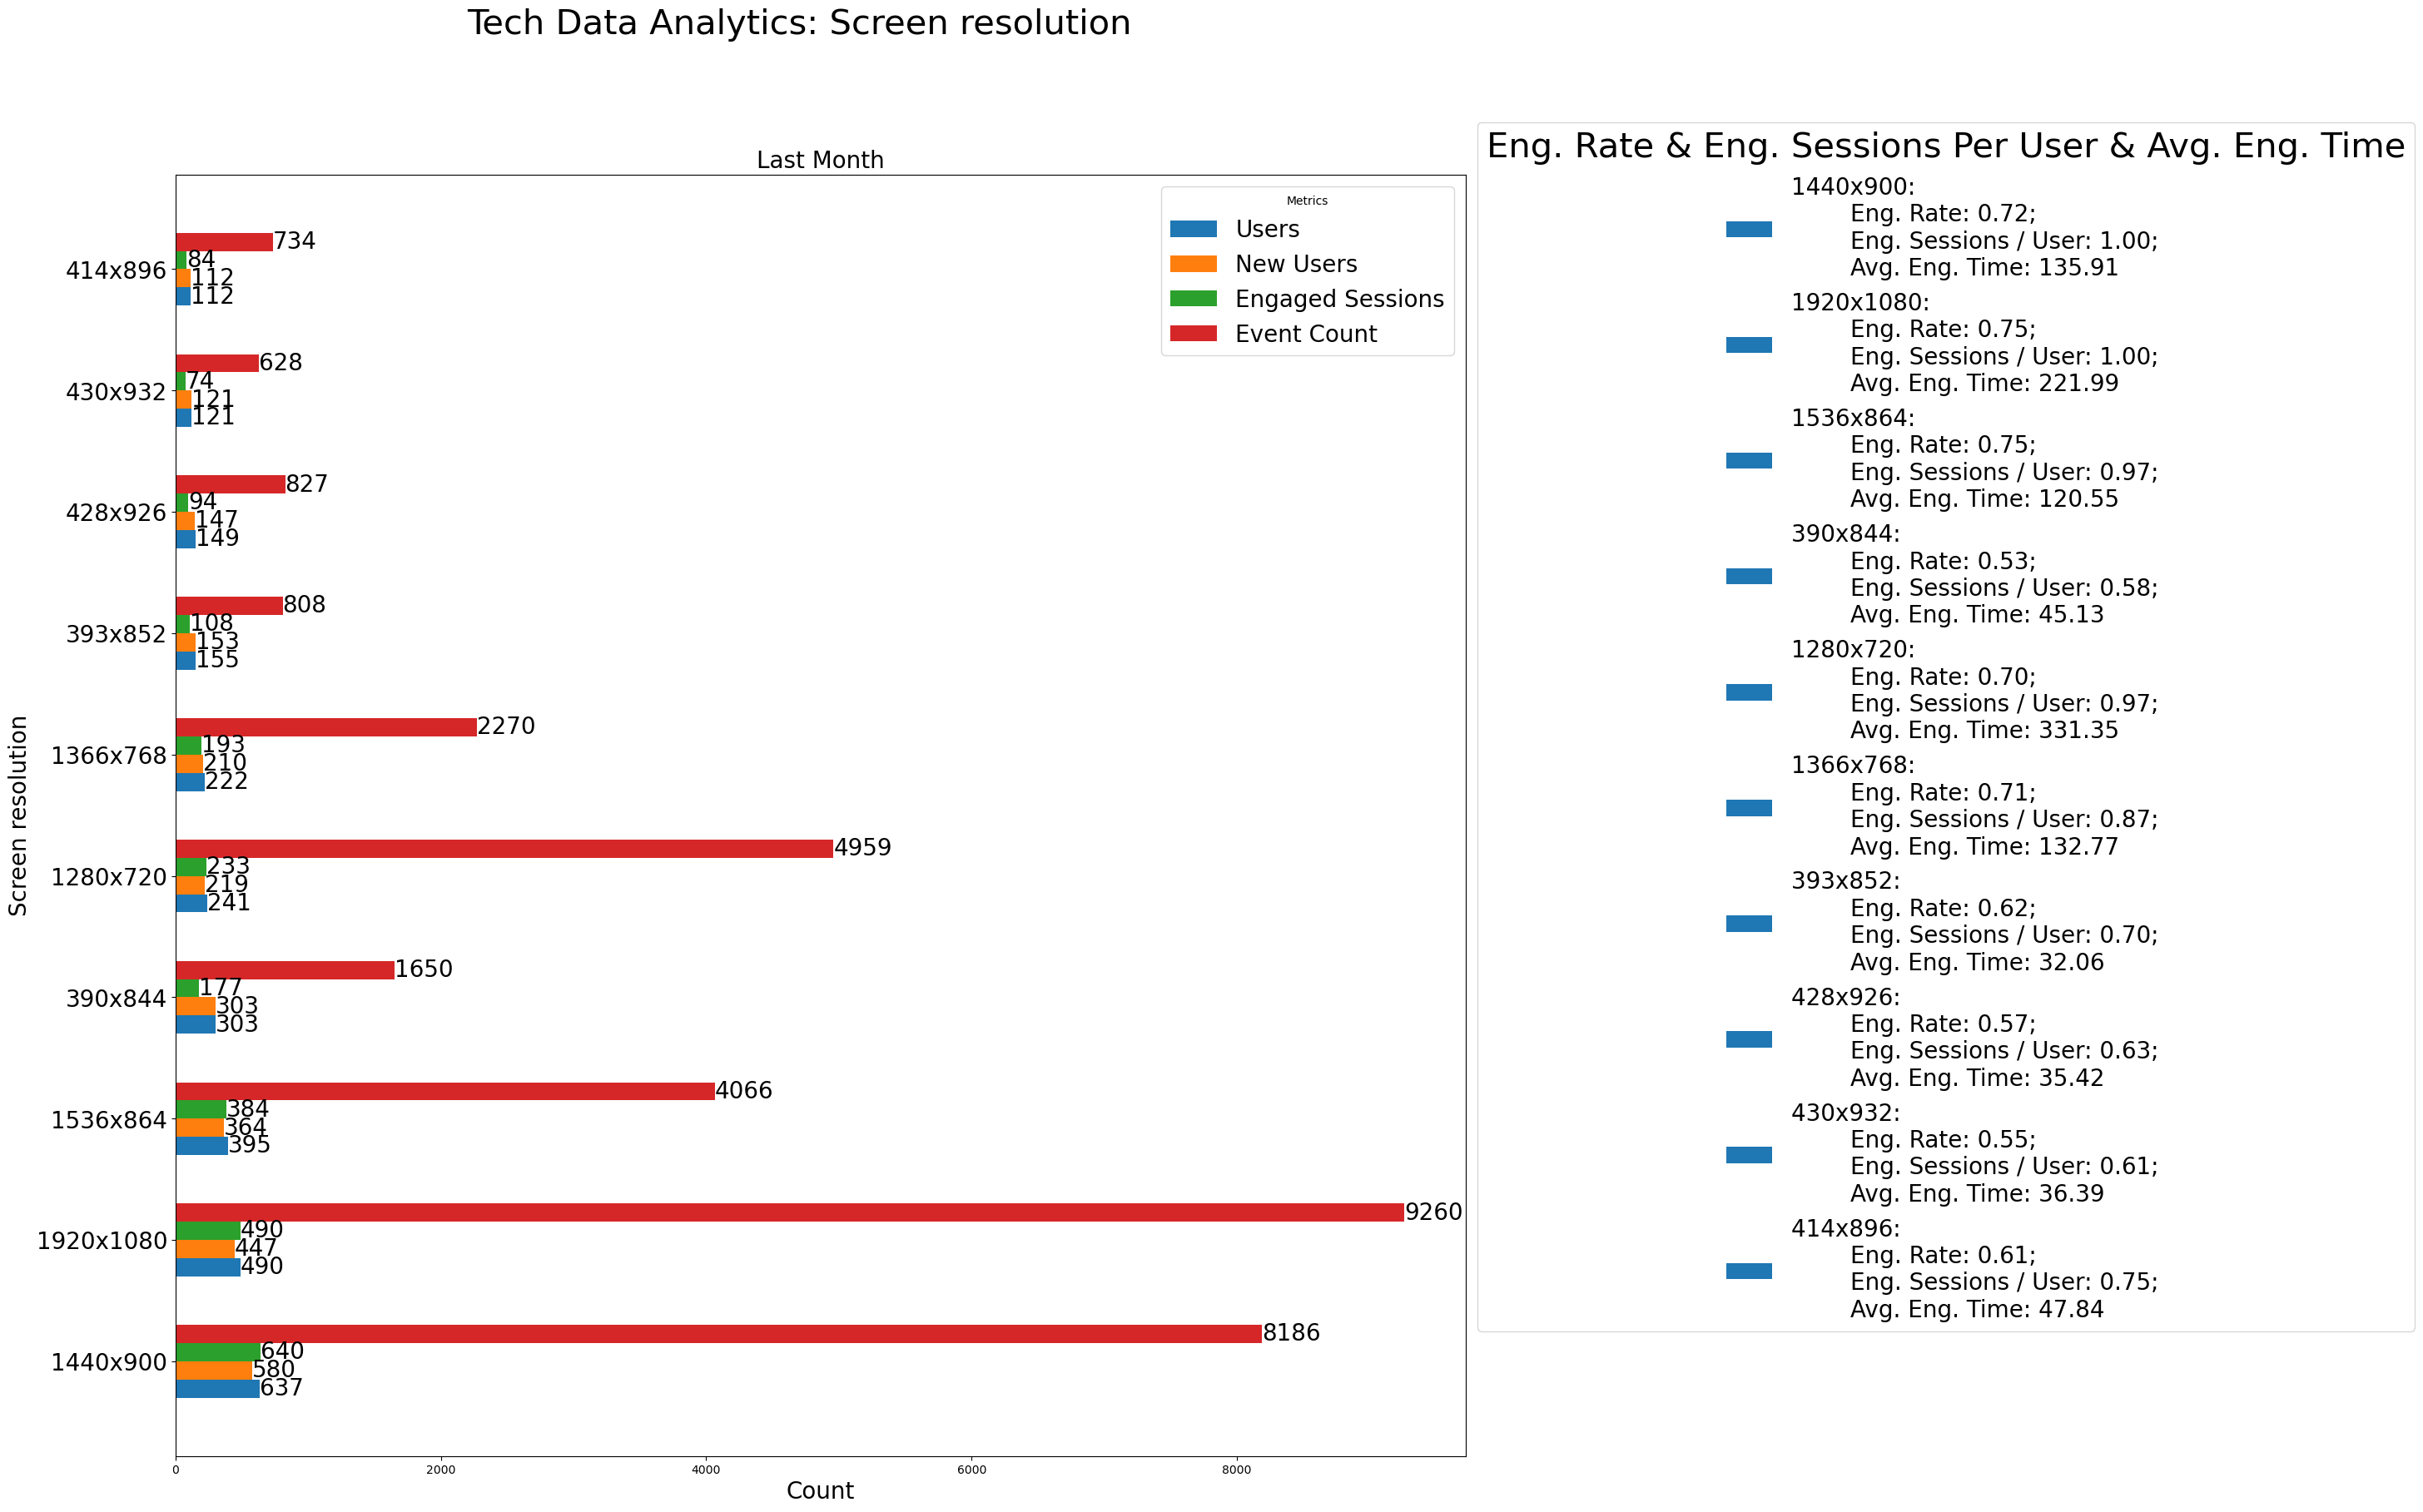

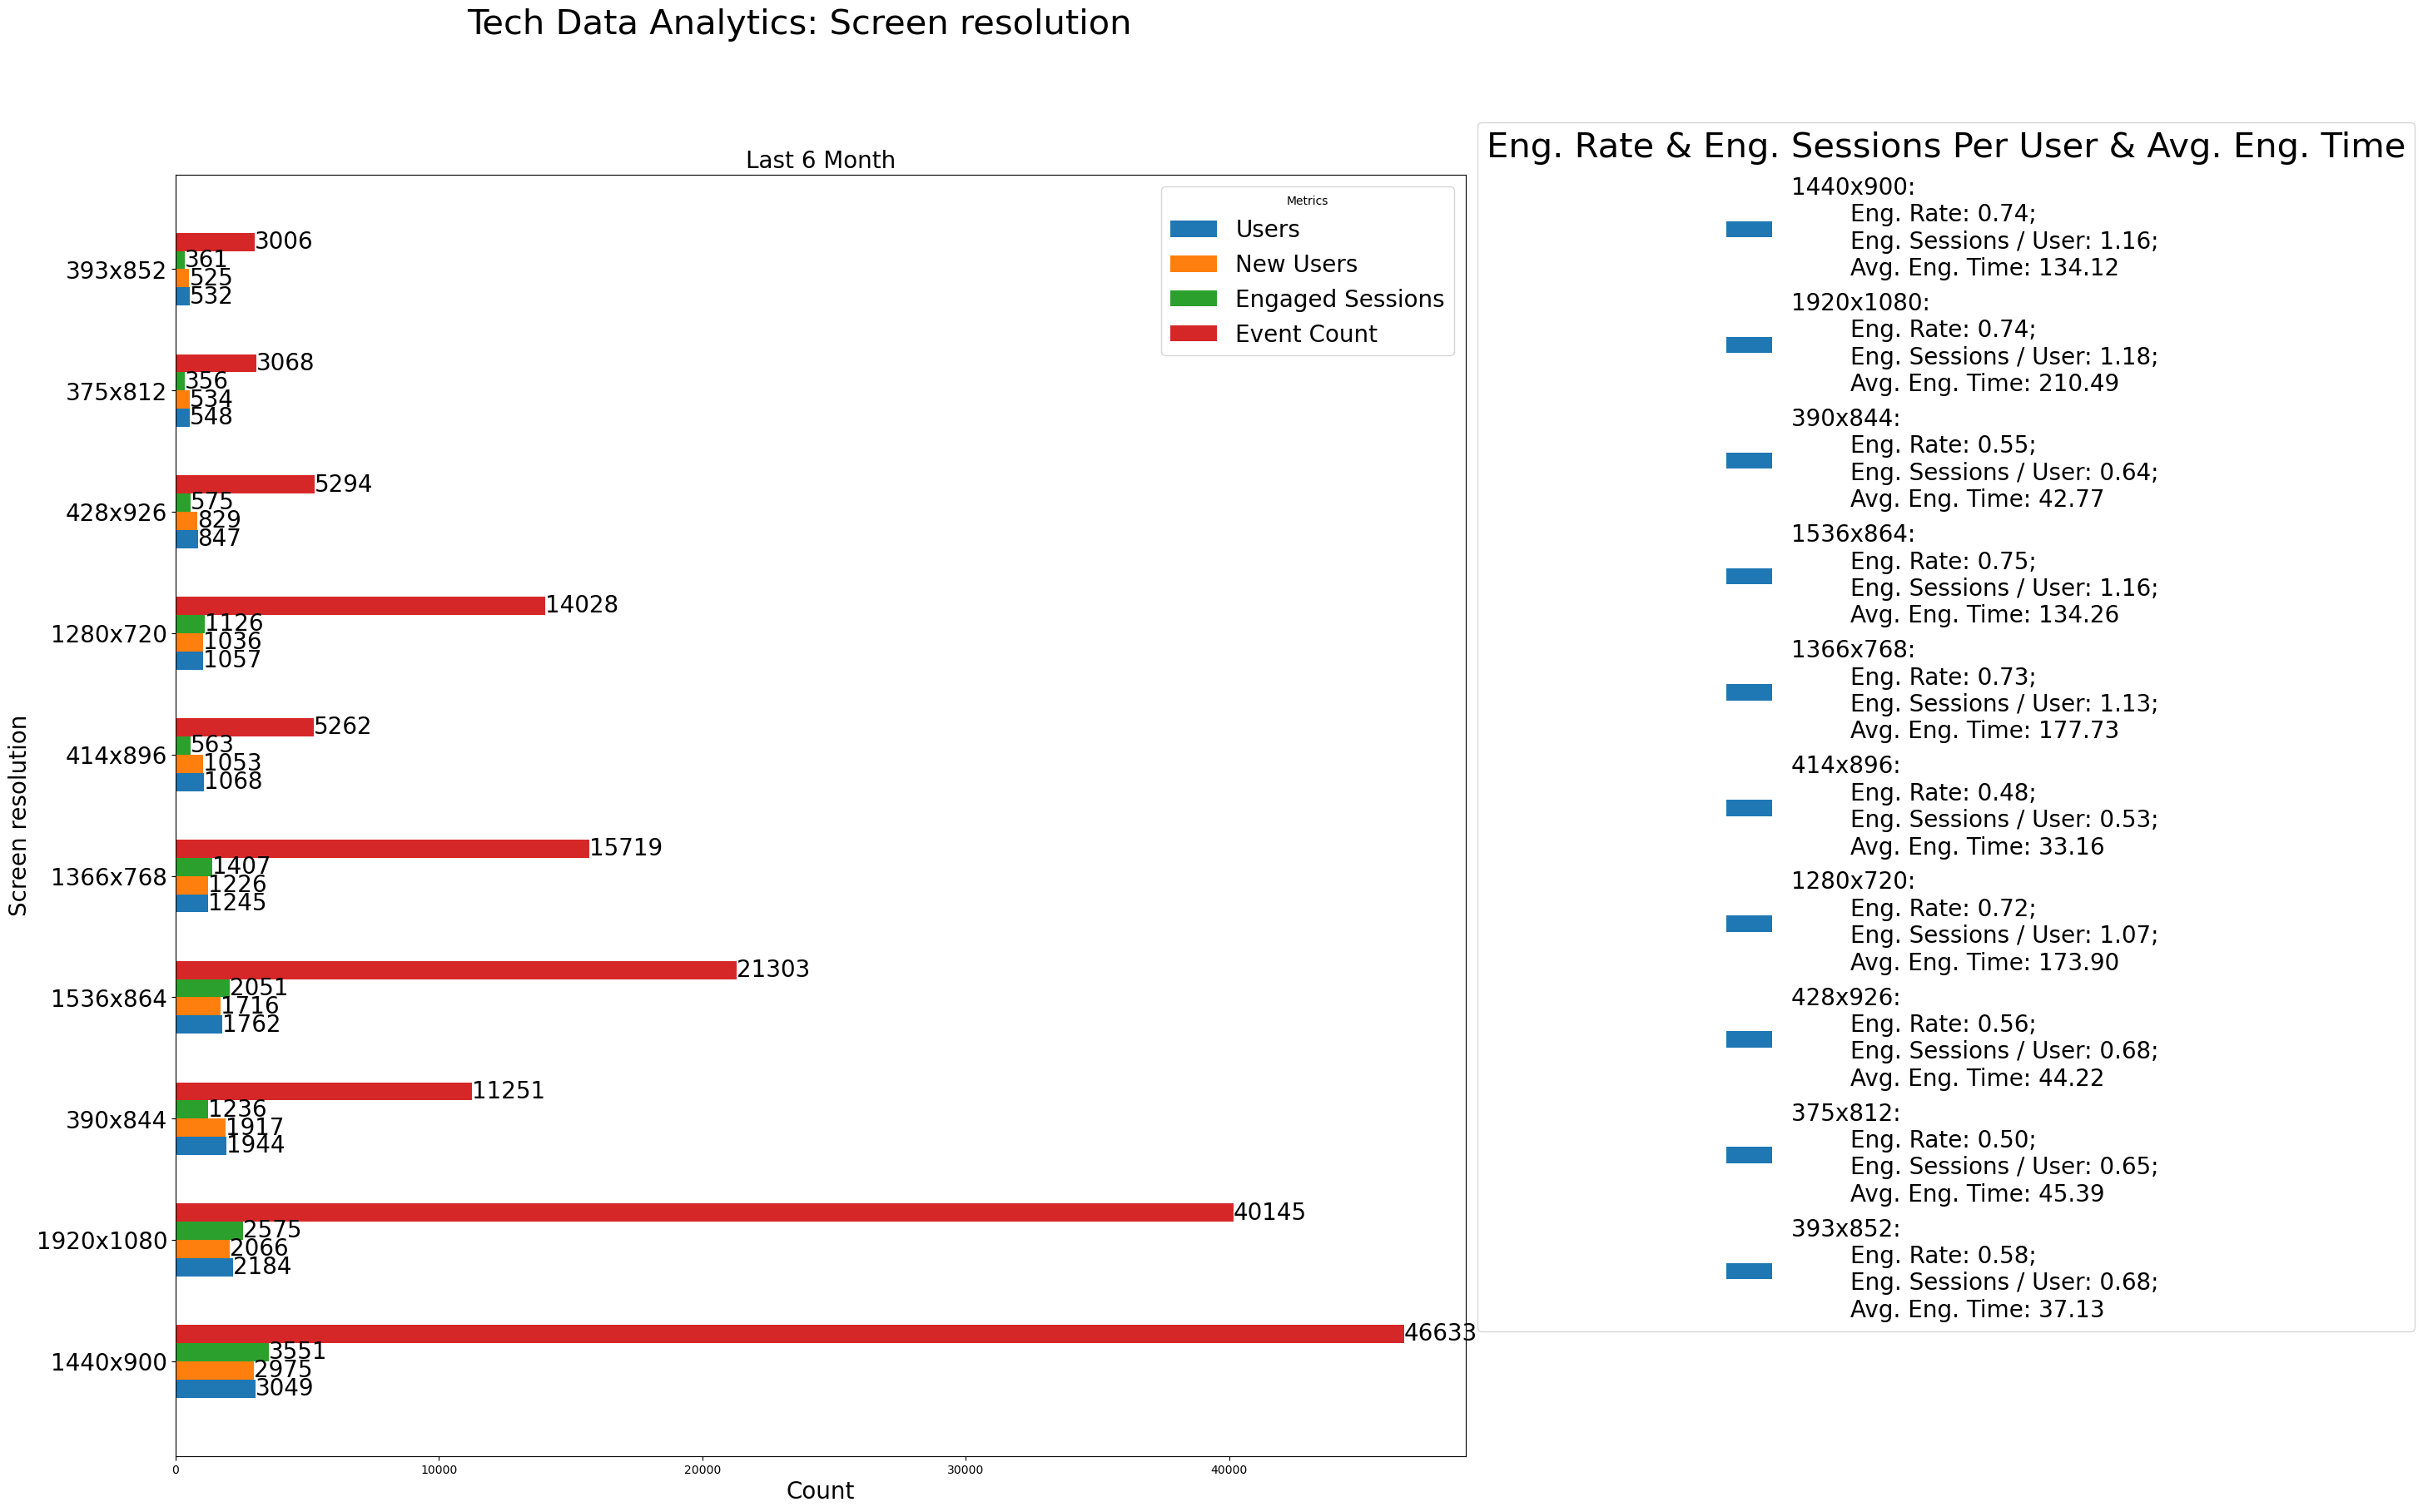

In [7]:
for a in range(3):
    barplot_tech(df_comb[a],title_=(subtitle_comb[a]),subfont=30,col=(df_comb[a]).columns[0],num=10)

In [8]:
#Pie Chart For Three Periods
#Note that pie chart is used to show percentages
def pieplot_tech(column,
                col="Screen resolution",#Display the metrics we are analyzing
                figsize1=20,#Figure's width
                figsize2=20,#Figure's height
                show=0.05,#Threshold of display of percentage
                font=10,#Text fontsize, including labels & inside text
                titlefont=20,#Title fontsize
                subfont=20,#Subtitle fontsize
                labeldisplay=5#Threshold to display the first labeldisplay largest's names
                ):#When running functions, lease adjust parameters if you want
    
    #Initialization
    plt.figure(figsize=(figsize1, figsize2))
    
    #Function to decide whether to display the percentage on the slice
    def autopct_format(values):
        def my_autopct(pct):
            total = sum(values)#Get total, values is a list of value
            val = int(round(pct*total/100.0))#Get percentage
            if val > (total * show):#If the slice is larger than 5% (default) of the total then display the percentage on plot
                return '{p:.2f}%'.format(p=pct)#Round to two decimal places
            else:
                return ''#Do not show
        return my_autopct
    
    #Construction of plots
    for i in range(3):
        #Sort: make the dimension decreasing
        df = df_comb[i].sort_values(by=column, ascending=False)
        plt.subplot(3,1,(i+1))#Set subplots: three rows one column
        labels_ = df[col]#Labels of pie chart, act as a vector
        labels_[labeldisplay:] = ""#Do not display label after the first 5 (default) largest
        sizes = df[column]##Get exact values' list, for future text usage
        #We are interested in all now
        #Draw pie chart according to percentage, set label size
        plt.pie(df[column], labels = labels_,textprops={'fontsize': font}, autopct=autopct_format(sizes))#autopct controls text inside
        plt.title(subtitle_comb[i],fontsize=titlefont)
    plt.suptitle(f"{column} For {col}",fontsize=subfont)
    
    #Show
    plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_23184\3026018953.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels_[labeldisplay:] = ""#Do not display label after the first 5 (default) largest


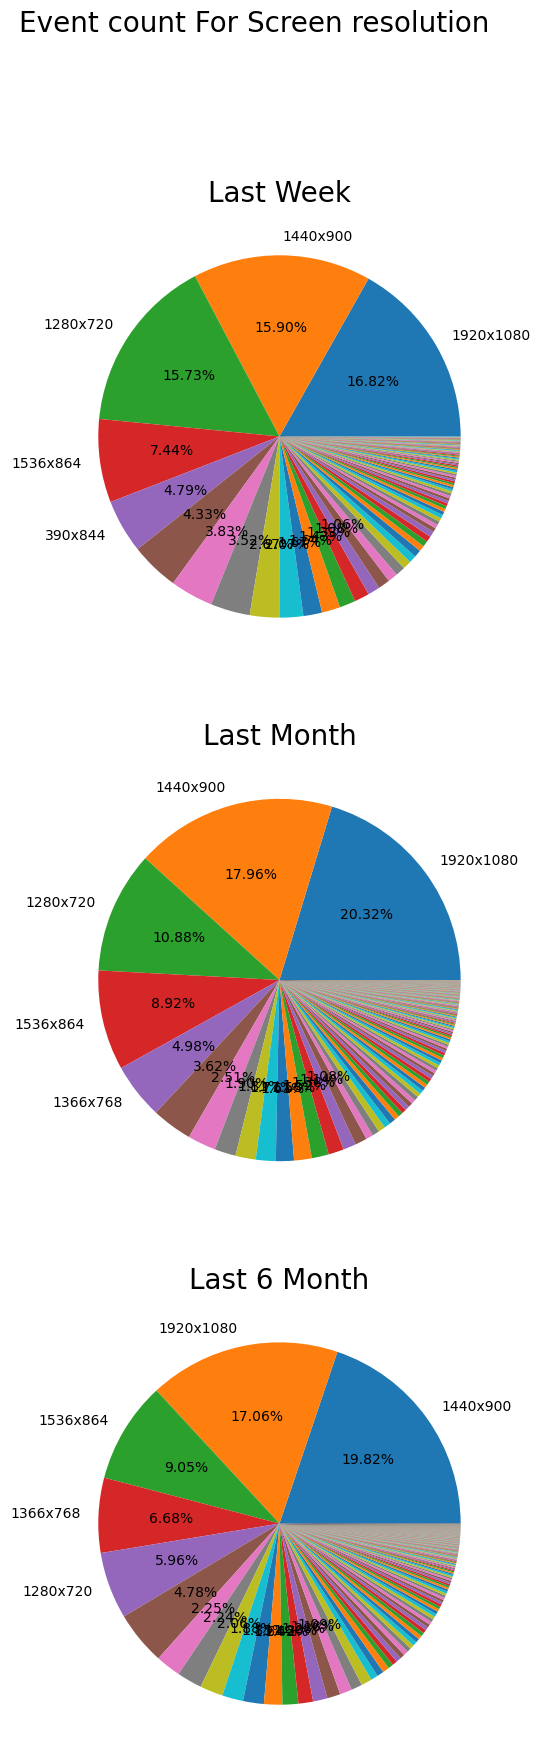

In [9]:
#Event Count: Pieplot
pieplot_tech(column="Event count",show=0.01,font=10,labeldisplay=5,col=(df_comb[0]).columns[0])

C:\Users\lenovo\AppData\Local\Temp\ipykernel_23184\3026018953.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels_[labeldisplay:] = ""#Do not display label after the first 5 (default) largest


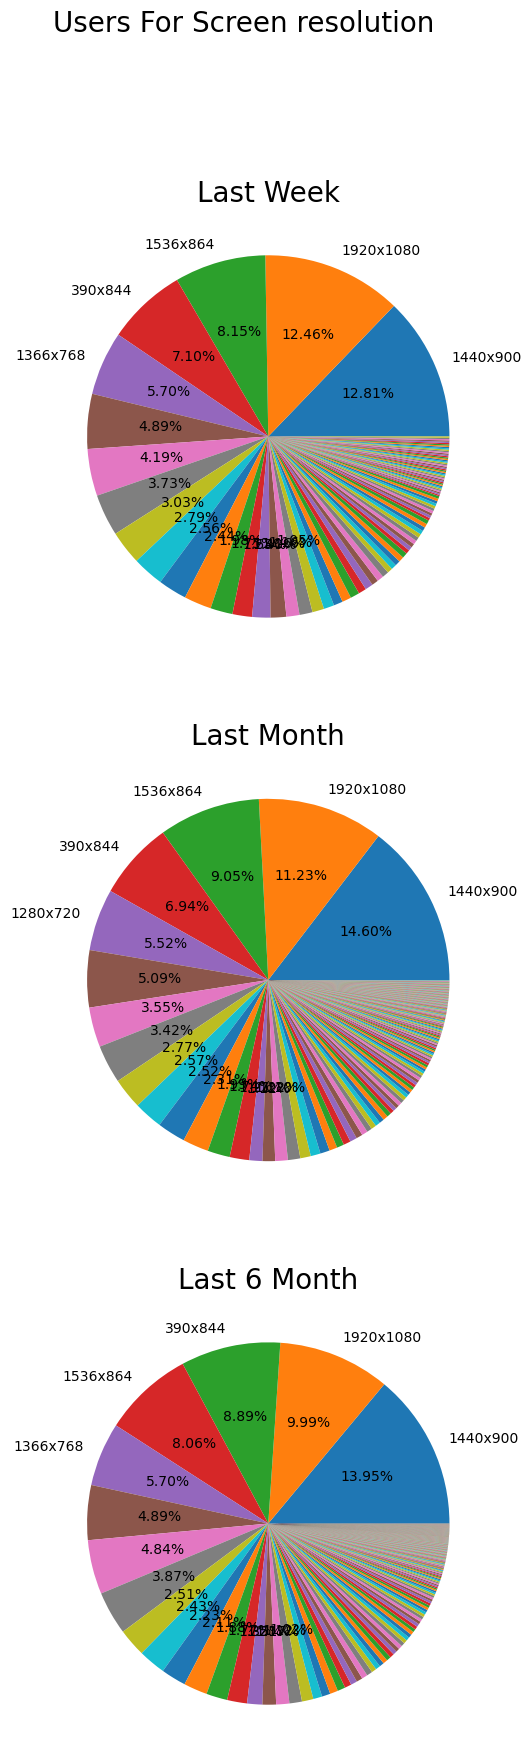

In [10]:
#Users: Pieplot
pieplot_tech(column="Users",show=0.01,font=10,labeldisplay=5,col=(df_comb[0]).columns[0])

C:\Users\lenovo\AppData\Local\Temp\ipykernel_23184\3026018953.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels_[labeldisplay:] = ""#Do not display label after the first 5 (default) largest


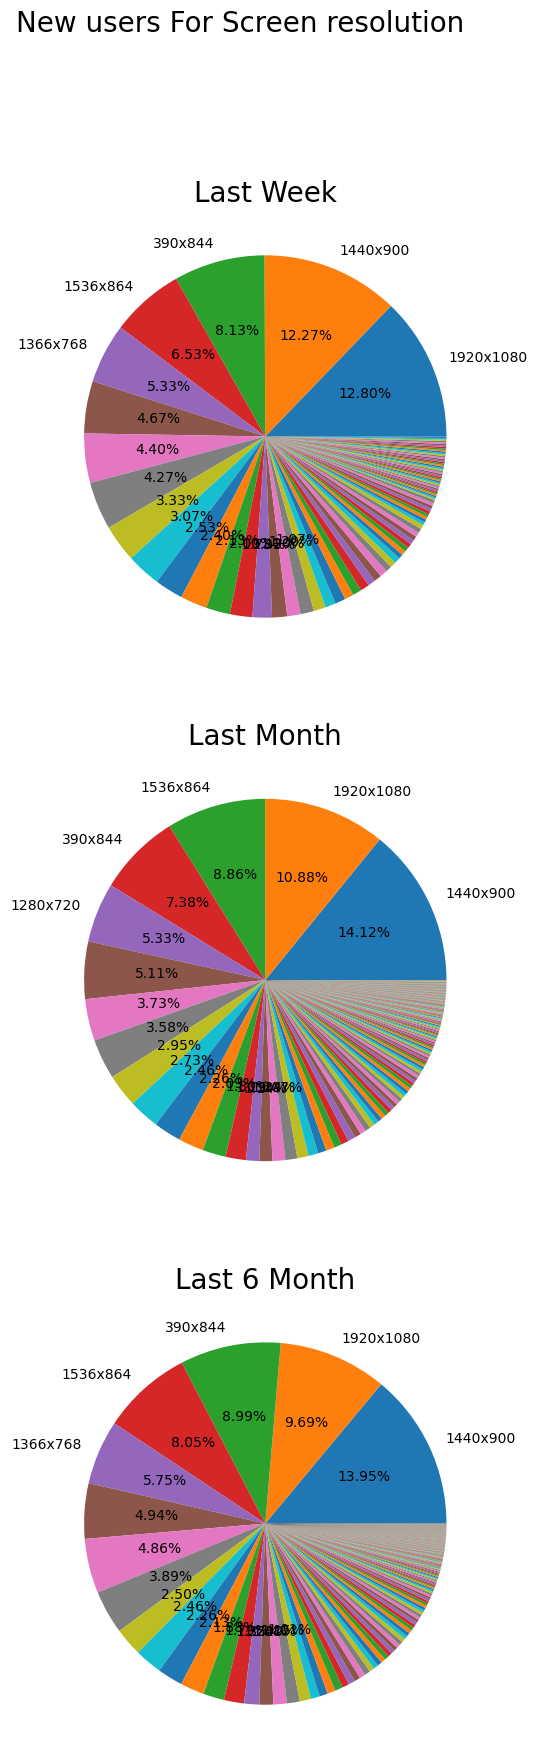

In [11]:
#New Users: Pieplot
pieplot_tech(column="New users",show=0.01,font=10,labeldisplay=5,col=(df_comb[0]).columns[0])

C:\Users\lenovo\AppData\Local\Temp\ipykernel_23184\3026018953.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels_[labeldisplay:] = ""#Do not display label after the first 5 (default) largest


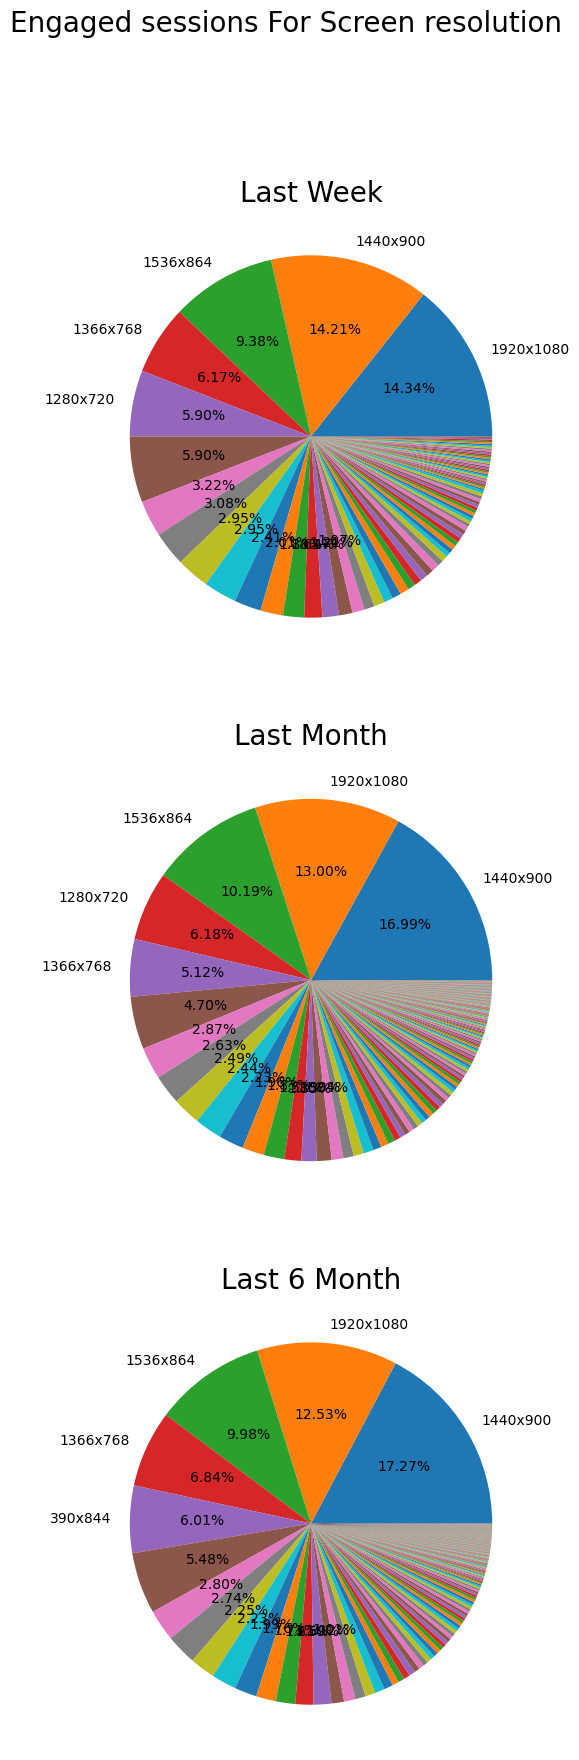

In [12]:
#Engaged Sessions: Pieplot
pieplot_tech(column="Engaged sessions",show=0.01,font=10,labeldisplay=5,col=(df_comb[0]).columns[0])

In [13]:
#Click File on the topleft, then click Print Preview to show the output, then make screenshots!|